In [9]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#Read in data
df = pd.read_csv("forestfires.csv") 

In [30]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,logArea
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.111026
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,1.398436
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.418710
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,2.024193
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.995620


In [33]:
from sklearn import metrics

#Clean data for regression. Log scale area, create dummy variables for months
df['logArea'] = np.log(df.area + 1)
X = df[df.columns[0:12]]
X = pd.get_dummies(X)
X = X._get_numeric_data()
y = df[df.columns[13:14]]

#Create train and test data sets for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 



In [ ]:
mseList = [0]
for i in range (100,120):
    forestReg = ensemble.RandomForestRegressor(n_estimators = 100)

    forestReg.fit(X_train, y_train.values.ravel())
    y_pred = forestReg.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred)
    mseList.append(mse)
    
plt.plot(mseList[1:])

plt.title("MSE of test data at each depth")

n_scores =  1.5814300722457806
0.09610158347358992


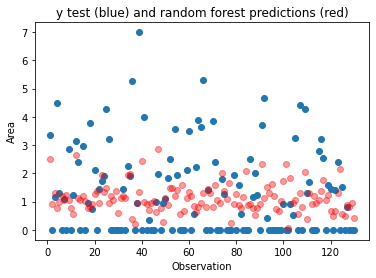

In [42]:
from sklearn import ensemble

#Random forest regression now

forestReg = ensemble.RandomForestRegressor(n_estimators = 100)

forestReg.fit(X_train, y_train.values.ravel())
y_pred = forestReg.predict(X_test)


n_scores = cross_val_score(forestReg, X_test, y_test.values.ravel(), scoring='neg_root_mean_squared_error')
print("n_scores = ", (np.mean(n_scores)*-1))
#Does not predict 0 as well but predicts high values slightly better
x = range(1,len(y_test) + 1)

plt.scatter(x, y_test)
plt.scatter(x, y_pred, color = "red", alpha = 0.4)
plt.ylabel('Area')
plt.xlabel('Observation')
plt.title("y test (blue) and random forest predictions (red)")

n_scores = cross_val_score(forestReg, X_test, y_test.values.ravel(), scoring='r2')
print(np.mean(n_scores)*-1)